In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
from sklearn.datasets import make_moons

In [6]:
X_train, Y_train = make_moons(100)
X_train_flat = X_train

In [7]:
X_test, Y_test = make_moons(100)
X_test_flat = X_test

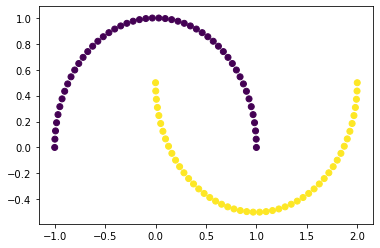

In [8]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

In [9]:
embedder = tfUMAP(n_neighbors = 10, direct_embedding=False, verbose=True)

In [10]:
print(embedder)

tfUMAP(negative_sample_rate=5,
       optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f852b7220b8>,
       tensorboard_logdir='/tmp/tensorboard/20200706-105114')


In [11]:
z = embedder.fit_transform(X_train_flat)

tfUMAP(negative_sample_rate=5,
       optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f852b7220b8>,
       tensorboard_logdir='/tmp/tensorboard/20200706-105114')
Construct fuzzy simplicial set
Mon Jul  6 10:51:14 2020 Finding Nearest Neighbors
Mon Jul  6 10:51:16 2020 Finished Nearest Neighbor Search
Mon Jul  6 10:51:18 2020 Embedding with TensorFlow


Mon Jul  6 10:51:21 2020 Finished embedding



### Plot model output

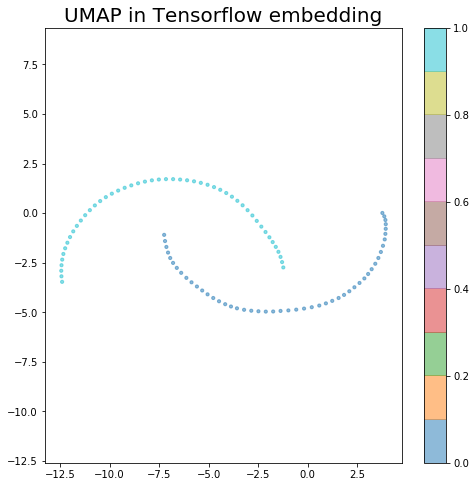

In [12]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=10,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### View loss

In [13]:
from tfumap.umap import retrieve_tensors
import seaborn as sns

In [14]:
loss_df = retrieve_tensors(embedder.tensorboard_logdir)
loss_df[:3]

['umap_loss']
[]


,wall_time,step,val,group,variable
0,1.594058e+09,1,3.833781,train,umap_loss
1,1.594058e+09,2,3.341567,train,umap_loss
2,1.594058e+09,3,3.075392,train,umap_loss


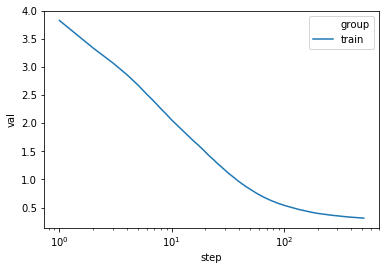

In [15]:
ax = sns.lineplot(x="step", y="val", hue="group", data=loss_df[loss_df.variable=='umap_loss'])
ax.set_xscale('log')

### Save model

In [16]:
from tfumap.paths import MODEL_DIR, ensure_dir

In [17]:
import pickle

In [18]:
import os

In [19]:
os.path.join(MODEL_DIR, 'test_save')

'/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/test_save'

In [20]:
ensure_dir(MODEL_DIR/'test_save'/ 'test_model')

In [21]:
embedder.save(MODEL_DIR/'test_save'/ 'test_model')

Pickle of model saved


W0706 10:51:24.093887 140212953085760 deprecation.py:506] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0706 10:51:24.160740 140212953085760 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/test_save/test_model/encoder/assets


Encoder Keras model saved


In [23]:
loaded_model = pickle.load((open(MODEL_DIR/'test_save'/ 'test_model'/'model.pkl', 'rb')))

In [24]:
loaded_model.load(MODEL_DIR/'test_save'/ 'test_model')

In [25]:
loaded_model.encoder

In [27]:
z = loaded_model.encoder(X_train[:100])

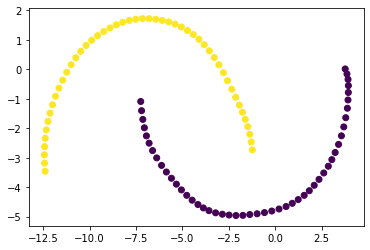

In [30]:
plt.scatter(z[:,0], z[:,1], c = Y_train[:100])